In [1]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
data=pd.read_csv('simulation_results.csv',parse_dates=['date'])

In [3]:
data

,date,current_capital,unclaimed_fees,projected_fees,reinvest_cost,p_value,day_projection
0,2022-03-08,1.000000e+06,45.671850,0.005443,88.953391,0.02,7
1,2022-03-09,1.000000e+06,72.794577,0.008709,77.913469,0.02,7
2,2022-03-10,1.000000e+06,121.070038,0.014342,66.573657,0.02,7
3,2022-03-11,1.000000e+06,146.496567,0.017420,63.226786,0.02,7
4,2022-03-12,1.000000e+06,217.096141,0.025475,47.280667,0.02,7
...,...,...,...,...,...,...,...
16095,2022-10-19,1.026590e+06,2405.554432,4.421508,29.802768,0.20,49
16096,2022-10-20,1.026590e+06,2474.652815,4.547345,31.753354,0.20,49
16097,2022-10-21,1.026590e+06,2522.493072,4.634391,31.245179,0.20,49
16098,2022-10-22,1.026590e+06,2539.496880,4.663778,20.143944,0.20,49


In [29]:
def annualized_return(df):
    row=df[df.date==df.date.max()].iloc[0]
    return ((row.current_capital+row.unclaimed_fees)/1000000-1)*365/len(data.date.unique())

def reinvestment_count(df):
    return (df.unclaimed_fees>df.unclaimed_fees.shift(-1)).sum()

def processResults(df):
    return pd.Series([annualized_return(df),reinvestment_count(df)],index=['annualized_return','reinvestment_count'])

In [33]:
result_df=data.groupby(['p_value','day_projection']).apply(processResults).reset_index()

In [34]:
result_df.sort_values('annualized_return',ascending=False)

,p_value,day_projection,annualized_return,reinvestment_count
69,0.20,49,0.046281,3.0
62,0.18,49,0.046279,3.0
55,0.16,49,0.046234,2.0
68,0.20,42,0.046234,2.0
60,0.18,35,0.046229,2.0
...,...,...,...,...
14,0.06,7,0.045924,0.0
8,0.04,14,0.045924,0.0
7,0.04,7,0.045924,0.0
2,0.02,21,0.045924,0.0


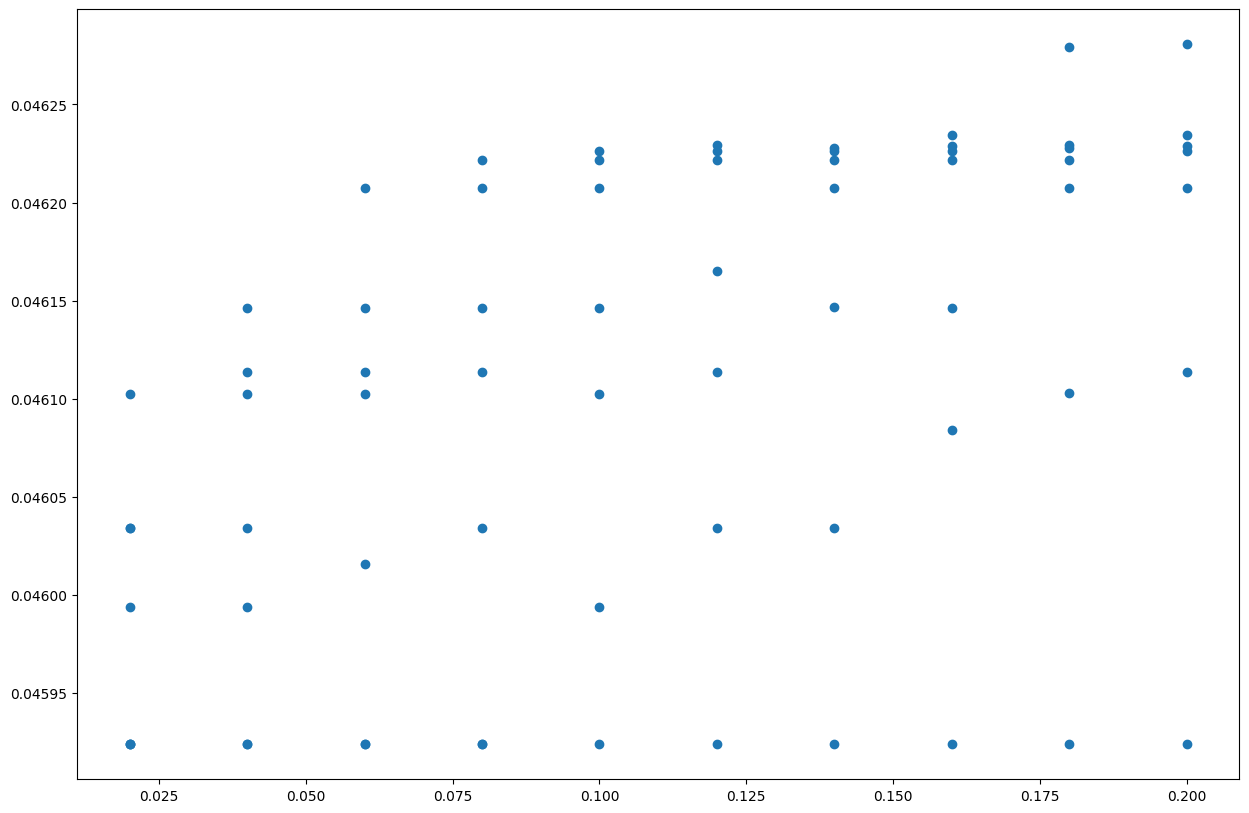

In [17]:
plt.scatter(result_df.p_value,result_df.annualized_return)

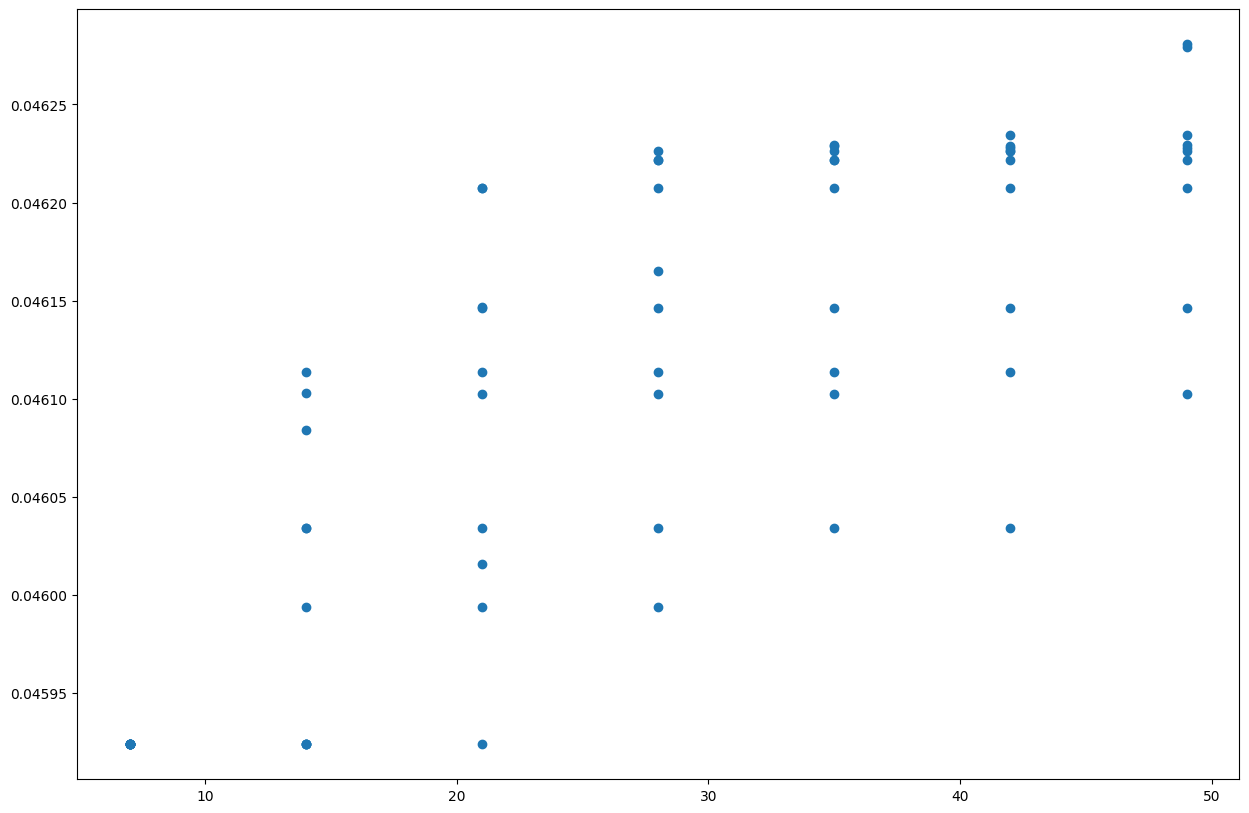

In [18]:
plt.scatter(result_df.day_projection,result_df.annualized_return)

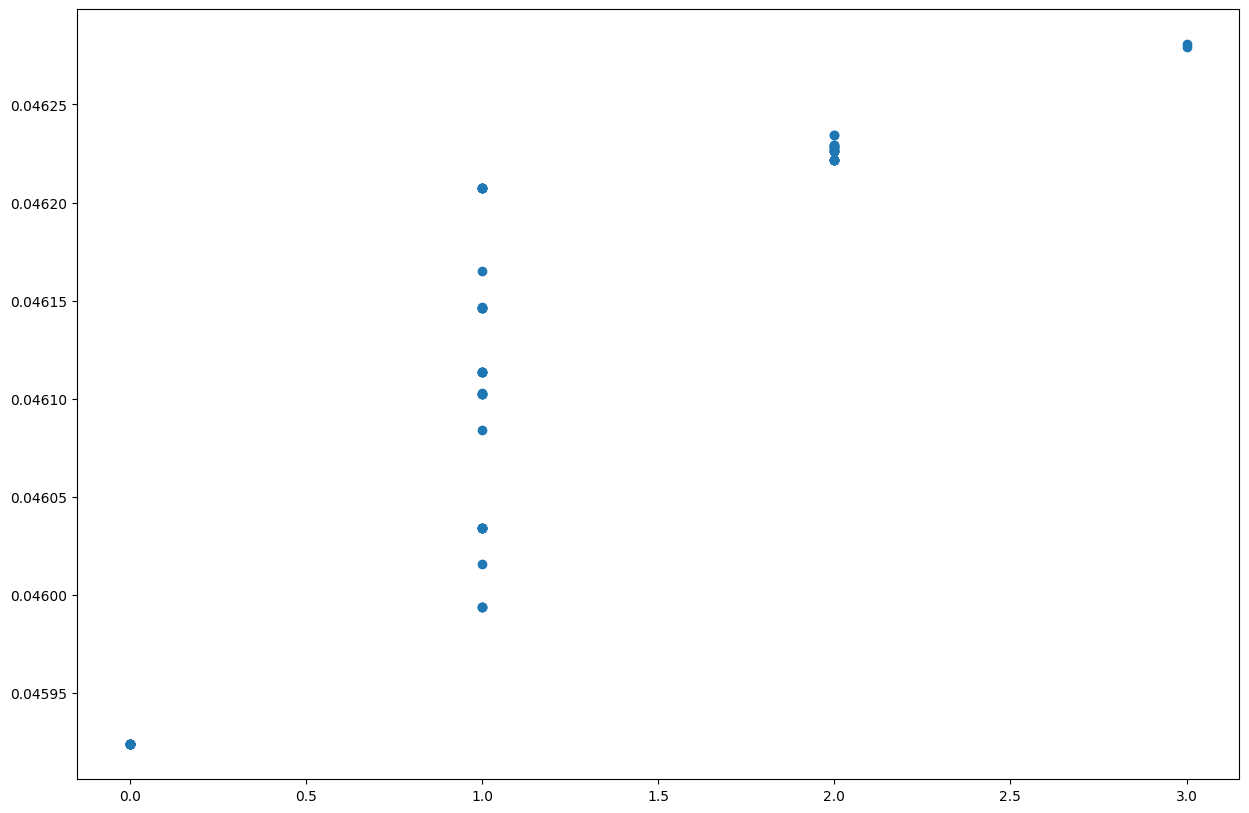

In [35]:
plt.scatter(result_df.reinvestment_count,result_df.annualized_return)